## Data Science Challenge
Description Of The Data: Please consider the description of the given data attributes: 
a) serial_no: Unique identifier variable for each tuple 
b) C1 to C6: Continuous numerical variables 
c) C7 and C8: Categorical variables. Field input is string.

Objective Of The Problem: Objective of the problem is to predict the values of C7 attribute for the Test Data along withcorrect mapping to serial_number variable. Please write all predictions to a csv and upload the same on the platform. Please view the sample submission file for better understanding of how the submission file should be. Please note headers of the data should remain the same as in sample submission file. The total number of tuples as predicted should also be the same as in the sample submission file. Please use the training file for creating a data model.

Evaluation Metric: Evaluation metric for this problem statement is precision based accuracy. The precision based accuracy score is normalized to 100. If there are total X tuples which are to be predicted and Y tuples were predicted correctly then score would be (Y/X)*100.

Computing Resource: Please use personal computing resource to make predictions and uploaded the submission file.

In [3]:
pwd

'E:\\Hackathon\\Skillenza\\data'

In [2]:
import os
os.chdir('E:\\Hackathon\\Skillenza\\data')

#### Loading the Files

In [4]:
import numpy as np
import pandas as pd

In [80]:
df_tr = pd.read_csv('data_semantics_training1a.csv')
df_te = pd.read_csv('data_sematics_test_sub1a.csv')

In [6]:
df_tr.head()

,serial_no,C1,C2,C3,C4,C5,C6,C8,C7
0,1,1,1,15200,80,6.50,24,Live,Healthy
1,5,5,5,44000,100,10.00,60,Live,Healthy
2,10,10,10,26100,90,7.75,42,Live,Healthy
3,14,14,14,31000,100,9.00,54,Live,Healthy
4,15,15,15,26100,90,7.75,42,Live,Healthy


In [7]:
df_te.head()

,serial_no,C1,C2,C3,C4,C5,C6,C8
0,6,705,705,57600,90,11.75,30,Live
1,7,706,706,22400,80,7.25,18,Live
2,17,716,716,15200,80,7.50,24,Live
3,19,718,718,34200,90,9.75,48,Live
4,20,719,719,27900,90,9.50,48,Live


### Data Cleaning

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
tot = pd.read_csv('Total.csv')

In [51]:
tot.head()

,serial_no,C1,C2,C3,C4,C5,C6,C8,C7
0,1,1,1,15200,80,6.50,24,Live,Healthy
1,5,5,5,44000,100,10.00,60,Live,Healthy
2,10,10,10,26100,90,7.75,42,Live,Healthy
3,14,14,14,31000,100,9.00,54,Live,Healthy
4,15,15,15,26100,90,7.75,42,Live,Healthy


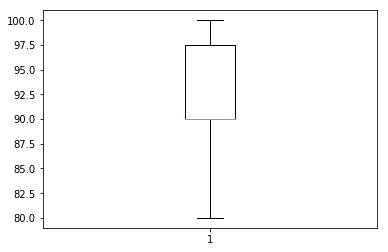

In [82]:
plt.boxplot(df_te['C4'])
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [83]:
df_tr[['C7']] = le.fit_transform(df_tr[['C7']])

C:\Users\BLAZIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
df_tr.head()

,serial_no,C1,C2,C3,C4,C5,C6,C8,C7
0,1,1,1,15200,80,6.50,24,Live,0
1,5,5,5,44000,100,10.00,60,Live,0
2,10,10,10,26100,90,7.75,42,Live,0
3,14,14,14,31000,100,9.00,54,Live,0
4,15,15,15,26100,90,7.75,42,Live,0


##### 0 - Healthy
1 - Unhealthy

##### Fit the train and test data

In [84]:
x = df_tr[['C3', 'C4', 'C5', 'C6']]

In [85]:
y = df_tr[['C7']]

In [27]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=294, stratify=y)

##### Balancing the data with SMOTE

In [59]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=294)

In [30]:
x_train.columns

Index(['C3', 'C4', 'C5', 'C6'], dtype='object')

In [32]:
x_train.shape

(66, 4)

In [31]:
y_train['C7'].value_counts()

0    49
1    17
Name: C7, dtype: int64

In [87]:
x_train_sm, y_train_sm = sm.fit_sample(x, y)

C:\Users\BLAZIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))

After OverSampling, the shape of train_X: (122, 4)
After OverSampling, the shape of train_y: (122,) 

After OverSampling, counts of label '1': 61
After OverSampling, counts of label '0': 61


## Fit the model - xgBoost

### class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
Bases: xgboost.sklearn.XGBModel, object

Implementation of the scikit-learn API for XGBoost classification.

Parameters:	
max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate (xgb’s “eta”)

n_estimators (int) – Number of boosted trees to fit.

objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

booster (string) – Specify which booster to use: gbtree, gblinear or dart.

n_jobs (int) – Number of parallel threads used to run xgboost. (replaces nthread)

gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

reg_alpha (float (xgb's alpha)) – L1 regularization term on weights

reg_lambda (float (xgb's lambda)) – L2 regularization term on weights

seed (int) – Random number seed. (Deprecated, please use random_state)

random_state (int) – Random number seed. (replaces seed)

missing (float, optional) – Value in the data which needs to be present as a missing value. If None, defaults to np.nan.

importance_type (string, default "gain") – The feature importance type for the feature_importances_ property: either “gain”, “weight”, “cover”, “total_gain” or “total_cover”.


In [109]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier(booster='gbtree', max_depth=10, n_estimator=3000, objective='binary:logistic', n_jobs=-1)

In [100]:
xg_cl

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimator=1000,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [110]:
xg_model = xg_cl.fit(x_train_sm, y_train_sm)

In [111]:
y_pred = xg_model.predict(np.array(x_test))

In [112]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [39]:
y_test

,C7
54,1
33,1
1,0
34,0
16,0
29,0
52,0
6,1
35,0
78,0


In [40]:
from sklearn.metrics import confusion_matrix

In [113]:
confusion_matrix(y_test, y_pred)

array([[12,  0],
       [ 1,  4]], dtype=int64)

In [114]:
(12+4)/(12+0+1+4)

0.9411764705882353

In [71]:
df_te.head()

,serial_no,C1,C2,C3,C4,C5,C6,C8
0,6,705,705,57600,90,11.75,30,Live
1,7,706,706,22400,80,7.25,18,Live
2,17,716,716,15200,80,7.50,24,Live
3,19,718,718,34200,90,9.75,48,Live
4,20,719,719,27900,90,9.50,48,Live


In [93]:
x_tr_t = df_te[['C3', 'C4', 'C5', 'C6']]

In [115]:
y_tr_pred = xg_model.predict(np.array(x_tr_t))

In [116]:
y_tr_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [99]:
y_tr_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [45]:
y_tr_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [96]:
df_te[['C7']] = pd.DataFrame(y_tr_pred)

In [98]:
pd.DataFrame(y_tr_pred)

,0
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [71]:
df_te.head()

,serial_no,C1,C2,C3,C4,C5,C6,C8,C7
0,6,705,705,48000,90,11.75,30,Live,0
1,7,706,706,22400,80,7.25,18,Live,1
2,17,716,716,15200,80,7.50,24,Live,0
3,19,718,718,34200,90,9.75,48,Live,0
4,20,719,719,27900,90,9.50,48,Live,0


In [97]:
df_te.to_csv('xgboost_out.csv')

## Fit the model - SVM

In [27]:
from sklearn.svm import SVC

In [35]:
svm = SVC(gamma="scale")

In [42]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters = {'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1], 'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')}
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [45]:
svm_searcher = GridSearchCV(svm, parameters, cv=5)
svm_searcher.fit(x, np.ravel(y))

C:\Users\BLAZIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1], 'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
svm_searcher.best_params_


{'C': 0.1, 'gamma': 1e-05, 'kernel': 'linear'}

In [48]:
svm_searcher.best_score_

svm_searcher.score(x_test, y_test)

0.7058823529411765

In [49]:
svm1 = SVC(gamma=0.0001, C=0.1, kernel='linear')

In [67]:
sv_model = svm1.fit(x_train_sm, y_train_sm)

In [68]:
y_tr_pred = sv_model.predict(np.array(x_tr_t))

In [69]:
y_tr_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [70]:
df_te[['C7']] = pd.DataFrame(y_tr_pred)

In [72]:
df_te.head()

,serial_no,C1,C2,C3,C4,C5,C6,C8,C7
0,6,705,705,57600,90,11.75,30,Live,0
1,7,706,706,22400,80,7.25,18,Live,1
2,17,716,716,15200,80,7.50,24,Live,1
3,19,718,718,34200,90,9.75,48,Live,0
4,20,719,719,27900,90,9.50,48,Live,0


In [73]:
df_te.to_csv('svm_out.csv')